In [1]:
import scipy.constants as cont
import numpy as np
from scipy.fft import fft, fftfreq

import copy
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from fticr_toolkit import trapped_ion as ti
from fticr_toolkit import ideal_trap_physics as ideal
from fticr_toolkit import systematics as sys_fun


In [2]:
trap = copy.deepcopy(ti.example_trap)
pprint(trap)

ionBs = "187Os29+"
ionAs = "187Re29+"

ionBs = "172Yb42+"
ionAs = "176Yb42+"

theratio = ti.Ratio(ionAs, ionBs, trap)


{'B0': 7.00276641+/-1e-08,
 'B1': 0.00141+/-0.00027,
 'B2': 0.024+/-0.005,
 'B3': 0.0+/-0,
 'B4': 0.0+/-0,
 'Bdrift_per_hour': -1e-09+/-1.0000000000000002e-10,
 'C1': 0.0+/-0,
 'C2': -14960.0+/-70.0,
 'C3': 0.0+/-0,
 'L_res': 0.0015+/-0.0001,
 'Q_res': 4000.0+/-300.0,
 'TR_opt4': 0.880143+/-0.0001,
 'TR_opt6': 0.8786+/-0.00013,
 'TR_set': 0.8800002,
 'Temp_res': 8.0+/-0.5,
 'd2': -2.5+/-124.0,
 'd4': 887800000.0+/-10000000.0,
 'd6': -61000000000000.0+/-10000000000000.0,
 'dBB_per_second': 3e-11+/-5e-12,
 'dUU_per_second': 1e-07+/-2e-08,
 'd_eff_res': 0.011+/-0.001,
 'idx': 2,
 'nu_res': 707000.7+/-10.0,
 'trap_offsets': [0, 0, 0, 0, 0],
 'trap_radius': 0.005+/-5e-06}
-53491322.0
163868040481.08725
-59255456.0
160136299937.49426


In [3]:
Tevol = 70.1
optimal_Tevol = True
ref = False#70.1 #False#70.1
Tevol_z = 0.001
Bdrift_factor = 1
number_of_mc = 4.0
A = 1
offset = 0#-A/2 # doesn't do anything
phase = 0 # sensitive
time_per_cycle = 25/60 # in hours
time_per_mcycle = 12


# we have 26 phases (averaged) per 12 hours => 0.46 h/phase
time_stepsA = np.arange(0, number_of_mc*time_per_mcycle, time_per_cycle)
time_stepsB = time_stepsA + time_per_cycle/2
print(time_stepsA)

bdrift = trap["Bdrift_per_hour"].n * Bdrift_factor
bdrift_steps = time_stepsA*bdrift
print(bdrift_steps)

Batphases = trap["B0"].n + bdrift_steps
print(Batphases)
trap["B0"] = Batphases

[ 0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.          5.41666667  5.83333333  6.25        6.66666667  7.08333333
  7.5         7.91666667  8.33333333  8.75        9.16666667  9.58333333
 10.         10.41666667 10.83333333 11.25       11.66666667 12.08333333
 12.5        12.91666667 13.33333333 13.75       14.16666667 14.58333333
 15.         15.41666667 15.83333333 16.25       16.66666667 17.08333333
 17.5        17.91666667 18.33333333 18.75       19.16666667 19.58333333
 20.         20.41666667 20.83333333 21.25       21.66666667 22.08333333
 22.5        22.91666667 23.33333333 23.75       24.16666667 24.58333333
 25.         25.41666667 25.83333333 26.25       26.66666667 27.08333333
 27.5        27.91666667 28.33333333 28.75       29.16666667 29.58333333
 30.         30.41666667 30.83333333 31.25       31.66666667 32.08333333
 32.5        32.91666667 33.33333333 33.75       34

-53491322.0
163868040481.08725
-59255456.0
160136299937.49426
-89.21664759953607
69.79200000000186
opti evol 69.792


(0.0, 0.01)

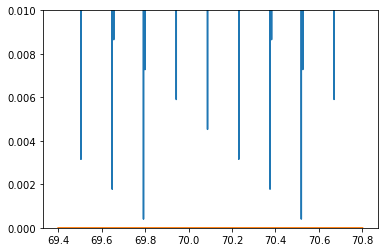

In [4]:
ionA = ti.Ion(trap, ionAs)

#ionA.show_frequencies()
cA, pA, z, m = ionA.get_frequencies()

#ionA.show_radii()
#trap["B0"] = Batphases + single_B_step/2
ionB = ti.Ion(trap, ionBs)
ionB.set_U0(U0=ionA.U0)
ionB.calc_eigenfrequencies()

cB, pB, z, m = ionB.get_frequencies()
R3 = cA/cB
#print(ionA.get_nu_frequencies(True))
#print(ionB.get_nu_frequencies(True))
#ionB.show_radii()

rng = 0.01
tev = np.arange(Tevol*(1-rng), Tevol*(1+rng), 1e-3)
y = (pA[0]-pB[0])/2/np.pi*tev%1
p = np.polyfit(tev, y, 1)
zero = -p[1]/p[0]
print(zero)
zero2 = tev[np.argmin(y)]
print(zero2)
if optimal_Tevol:
    lst = [zero, zero2]
    Tevol = min(lst, key=lambda x:abs(x-Tevol))
    Tevol = np.around(Tevol, 3)
    print('opti evol', Tevol)
plt.plot(tev, y)
plt.plot(tev, [0]*len(tev))
plt.ylim(0.0, 0.01)
#plt.vlines([zero], np.min(y), np.max(y))

phase A/B 1791129904.0939138 1832885392.0935144
N A/B 1791129904 1832885392
0.00439822971463598 1.200487731336226
[  0.59007777  -0.08004414  -0.75016754  -1.42029244  -2.09042033
  -2.76054224  -3.43066714  -4.10079204  -4.77091844  -5.44104184
  -6.11116674  -6.78129164  -7.45141354  -8.12154144  -8.79166784
  -9.46178974 -10.13191764 -10.80203954 -11.47216294 -12.14228934
 -12.81241274 -13.48253914 -14.15266404 -14.82278894 -15.49291085
 -16.16303575 -16.83316065 -17.50328704 -18.17341494 -18.84353684
 -19.51366174 -20.18378814 -20.85391304 -21.52403644 -22.19416434
 -22.86428625 -23.53440815 -24.20453605 -24.87466244 -25.54478435
 -26.21491075 -26.88503415 -27.55515755 -28.22528545 -28.89540885
 -29.56553375 -30.23566164 -30.90578355 -31.57590845 -32.24603035
 -32.91615525 -33.58628165 -34.25640805 -34.92652995 -35.59665485
 -36.26678275 -36.93690915 -37.60703105 -38.27715895 -38.94728085
 -39.61740575 -40.28752915 -40.95765705 -41.62777895 -42.29790385
 -42.96803025 -43.63815216 -

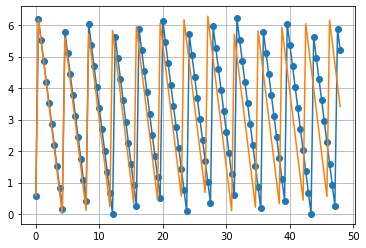

[0.0025092  0.01812314 0.03373709 0.04934654 0.064953   0.08056695
 0.0961764  0.11178585 0.12739531 0.14300776 0.15861721 0.17422666
 0.18984211 0.20544407 0.22105502 0.23666897 0.25227393 0.26788937
 0.28350332 0.29910828 0.31472222 0.33032868 0.34594113 0.36155358
 0.37716453 0.39277548 0.40838493 0.42399439 0.43960084 0.45521329
 0.47082275 0.4864322  0.50204315 0.5176541  0.53326505 0.548876
 0.56448845 0.58009341 0.59570736 0.61131831 0.62692626 0.64253572
 0.65815116 0.67375612 0.68936707 0.70497952 0.72058598 0.73619992
 0.75181088 0.76742332 0.78303278 0.79864373 0.81425018 0.82986263
 0.84547209 0.86108304 0.87669099 0.89230194 0.90791289 0.92352534
 0.9391333  0.95474575 0.9703552  0.98596765 1.0015771  1.01718506
 1.032799   1.04840846 1.06401641 1.07962587 1.09524131 1.11084777
 1.12645722 1.14206967 1.15767912 1.17329007 1.18889953 1.20450598
 1.22012442 1.23573088 1.25134033 1.26695428 1.28256224 1.29817169
 1.31377964 1.3293891  1.34500155 1.3606125  1.37622495 1.391832

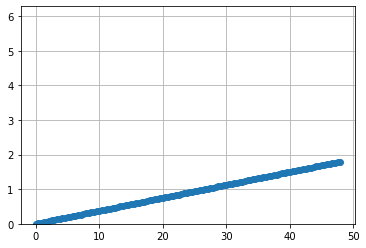

In [5]:
print("phase A/B", ionA.omegap[0]/2/np.pi*Tevol, ionB.omegap[0]/2/np.pi*Tevol)
print("N A/B", int(ionA.omegap[0]/2/np.pi*Tevol), int(ionB.omegap[0]/2/np.pi*Tevol))
ionA.phases = (ionA.omegap/2/np.pi*Tevol - int(ionA.omegap[0]/2/np.pi*Tevol))*2*np.pi
ionB.phases = (ionB.omegap/2/np.pi*Tevol - int(ionB.omegap[0]/2/np.pi*Tevol))*2*np.pi
nuz_phasesA = (ionA.omegaz/2/np.pi*Tevol_z - int(ionA.omegaz/2/np.pi*Tevol_z))*2*np.pi
nuz_phasesB = (ionB.omegaz/2/np.pi*Tevol_z - int(ionB.omegaz/2/np.pi*Tevol_z))*2*np.pi
print(nuz_phasesA, nuz_phasesB)
#ionA.phases += nuz_phasesA # this is not relevant, since this offset will be removed by phase-ref_phase
#ionB.phases += nuz_phasesB 
ionA.phases = ionA.phases.astype(np.float64)
ionB.phases = ionB.phases.astype(np.float64)

print(ionA.phases)
plt.plot(time_stepsA, ionA.phases%(2*np.pi), 'o-')
plt.plot(time_stepsA, ionB.phases%(2*np.pi), '-')
#plt.xlim((0, 6))
plt.grid()
plt.show()

print(ionA.phases-ionB.phases)
plt.plot(time_stepsA, (ionA.phases-ionB.phases)%(2*np.pi), 'o-')
plt.ylim((0, np.pi*2))
plt.grid()
plt.show()

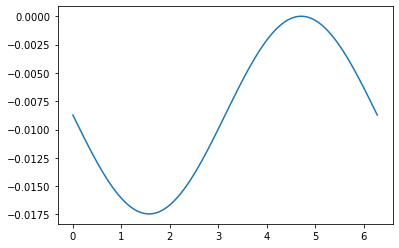

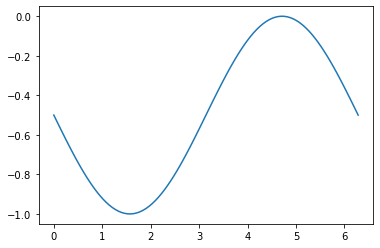

In [6]:
test_phases = np.linspace(0, 2*np.pi, 100)

def non_linearity(phase_in, A=7, off=0, phase=0):
    A = A / 360*2*np.pi # the actual amplitude of the non-linear readout effect
    off = off/180*np.pi # given a perfect doublet, this offset is pretty much what happens due to a non-linearity 
    # in the reference phase (which should be 'the same' for both ions): its only a common(!) offset
    phase = phase/180*np.pi # this should be the same as starting at different phases (magnetic field values)
    return -(A/2*np.sin(phase_in-phase) + A/2 + off)

plt.plot(test_phases, non_linearity(test_phases, A, offset, phase))
plt.show()
plt.plot(test_phases, non_linearity(test_phases, A, offset, phase)*360/2/np.pi)
plt.show()

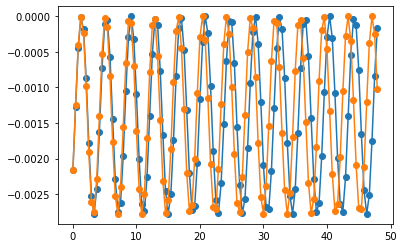

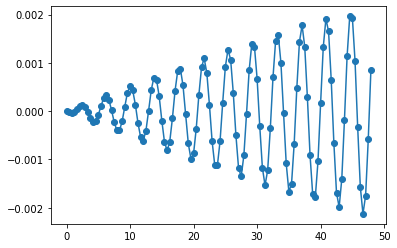

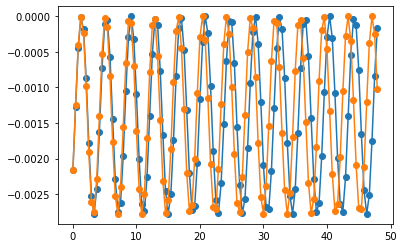

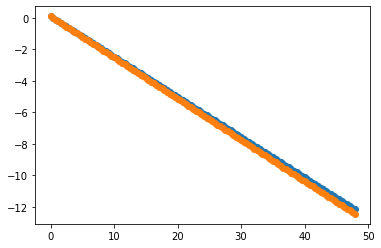

In [7]:
nlA = non_linearity(ionA.phases, A=A, off=offset, phase=phase)
nlB = non_linearity(ionB.phases, A=A, off=offset, phase=phase)

plt.plot(time_stepsA, nlA/2/np.pi, 'o-')
plt.plot(time_stepsA, nlB/2/np.pi, 'o-')
plt.show()

plt.plot(time_stepsA, (nlA-nlB)/2/np.pi, 'o-')
plt.show()


ionA.phases_nl = ionA.phases + nlA
ionB.phases_nl = ionB.phases + nlB

plt.plot(time_stepsA, (ionA.phases_nl - ionA.phases)/2/np.pi, 'o-')
plt.plot(time_stepsA, (ionB.phases_nl - ionB.phases)/2/np.pi, 'o-')
plt.show()

plt.plot(time_stepsA, ionA.phases_nl/2/np.pi, 'o-')
plt.plot(time_stepsA, ionB.phases_nl/2/np.pi, 'o-')
plt.show()

1791129904 1832885392 -41755488


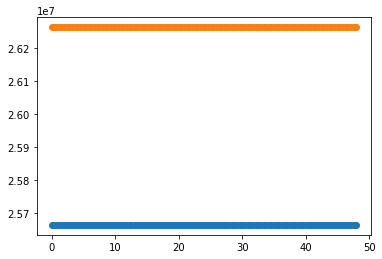

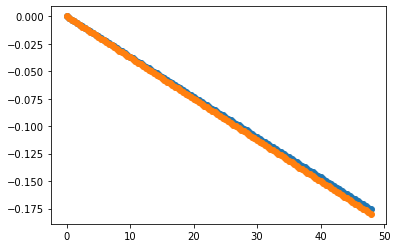

25663828.203251492 25663828.203231715
707000.7
9738.414429870096
25673566.61768136
25673566.617661588
0.023303526714769207
0.023303526714739897
0.023303526714739897
0.02330352671474012
0.02330352671474012
- R
-2.930988785010413e-14
-2.930988785010413e-14
-2.90878432451791e-14
-2.90878432451791e-14


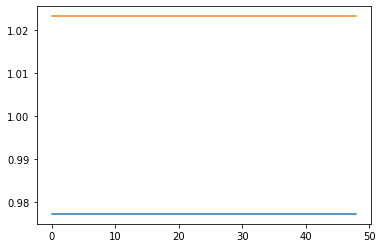

In [8]:

if ref:
    Tevol = ref
    ionA.N = ionA.omegap[0]/2/np.pi*Tevol
    ionB.N = ionB.omegap[0]/2/np.pi*Tevol

    print(ionA.N, ionB.N, ionA.N - ionB.N)

    ionA.nups = (ionA.N + nlA/2/np.pi)/Tevol
    ionB.nups = (ionB.N + nlB/2/np.pi)/Tevol
else:
    ionA.N = int(ionA.omegap[0]/2/np.pi*Tevol)
    ionB.N = int(ionB.omegap[0]/2/np.pi*Tevol)

    print(ionA.N, ionB.N, ionA.N - ionB.N)

    ionA.nups = (ionA.N + ionA.phases_nl/2/np.pi)/Tevol
    ionB.nups = (ionB.N + ionB.phases_nl/2/np.pi)/Tevol

plt.plot(time_stepsA, ionA.nups, 'o-')
plt.plot(time_stepsA, ionB.nups, 'o-')
plt.show()

plt.plot(time_stepsA, ionA.nups - ionA.nups[0], 'o-')
plt.plot(time_stepsA, ionB.nups - ionB.nups[0], 'o-')
plt.show()

cA, p, z, m = ionA.get_nu_frequencies(mean=True)
ionA.nuc = np.sqrt(ionA.nups**2 + (z)**2 + (m)**2 )
print(np.mean(p), np.mean(ionA.nups))
print(z)
print(m)
print(cA)
print(np.mean(ionA.nuc))
cB, p, z, m = ionB.get_nu_frequencies(mean=True)
ionB.nuc = np.sqrt(ionB.nups**2 + (z)**2 + (m)**2 )

R = ionA.nuc/ionB.nuc
R2 = ionA.omegac/ionB.omegac

plt.plot(time_stepsA, R)
plt.plot(time_stepsA, [theratio.R]*len(time_stepsA))

R = 1/np.mean(R)
R2 = 1/np.mean(R2)
R3 = 1/np.mean(R3)

print(R - 1)
print(theratio.R - 1)
print(cB/cA - 1)
print(R2 - 1)
print(R3 - 1)

print("- R")
print(theratio.R - R)
print(cB/cA - R)
print(R2 - R)
print(R3 - R)